In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [61]:
# read the csv file into pandas dataframe
texts = pd.read_csv("raw_data/train.csv", encoding = 'latin-1')

# create separate dataframes for each of the authors

eap = texts.loc[texts['author'] == 'EAP']
hpl = texts.loc[texts['author'] == 'HPL']
mws = texts.loc[texts['author'] == 'MWS']

In [59]:
# Adding an empty column 'compound' to each dataframe
eap["compound"]=""
hpl["compound"]=""
mws["compound"]=""



C:\Users\Bharathy_Nat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Bharathy_Nat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Bharathy_Nat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [44]:
compound1 = []
# Iterating through each rows in the datframe
for index,row in eap.iterrows():
    # Run sentiment analysis on each text
    results = analyzer.polarity_scores(row["text"])
    comp = results["compound"]
    compound1.append(comp)
# populating the values to the 'compound' column
eap["compound"]=compound1
eap.head()

C:\Users\Bharathy_Nat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,id,text,author,compound
0,id26305,"This process, however, afforded me no means of...",EAP,0.6329
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,0.9246
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP,0.0000
7,id13515,The surcingle hung in ribands from my body.,EAP,0.0000
8,id19322,I knew that you could not say to yourself 'ste...,EAP,0.8821


In [45]:
compound2 = []
for index,row in hpl.iterrows():
    # Run analysis
    results = analyzer.polarity_scores(row["text"])
    comp = results["compound"]
    compound2.append(comp)
    
hpl["compound"]=compound2
hpl.head()

C:\Users\Bharathy_Nat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,id,text,author,compound
1,id17569,It never once occurred to me that the fumbling...,HPL,-0.3400
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,-0.8385
12,id19764,Herbert West needed fresh bodies because his l...,HPL,-0.4588
13,id18886,The farm like grounds extended back very deepl...,HPL,0.3612
19,id20836,"His facial aspect, too, was remarkable for its...",HPL,0.9186


In [46]:
compound3 = []
for index,row in mws.iterrows():
    # Run analysis
    results = analyzer.polarity_scores(row["text"])
    comp = results["compound"]
    compound3.append(comp)
    
mws["compound"]=compound3
mws.head()

C:\Users\Bharathy_Nat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,id,text,author,compound
3,id27763,How lovely is spring As we looked from Windsor...,MWS,0.9460
5,id22965,"A youth passed in solitude, my best years spen...",MWS,0.8714
9,id00912,I confess that neither the structure of langua...,MWS,0.4215
10,id16737,He shall find that I can feel my injuries; he ...,MWS,-0.7506
15,id12799,"He had escaped me, and I must commence a destr...",MWS,-0.2037


In [50]:
# std dev of compound sentiments for EAP
std_eap = np.std(compound1)
std_eap

0.44600562624849616

In [51]:
# std dev of compound sentiments for HPL
std_hpl= np.std(compound2)
std_hpl

0.46504580534198275

In [52]:
# std dev of compound sentiments for MWS
std_mws = np.std(compound3)
std_mws

0.54874043891063429

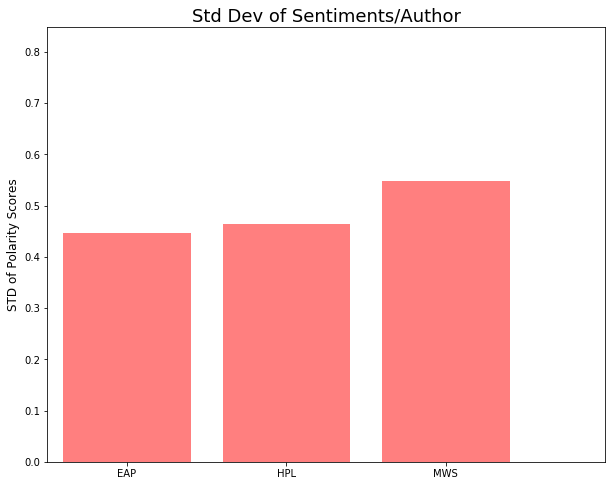

In [65]:
# plotting tha bar graphs for std of sentiments for authors
y_axis=[std_eap,std_hpl,std_mws]
x_axis=np.arange(0,len(y_axis),1)
plt.figure(figsize=(10,8))

plt.bar(x_axis,y_axis,color='r', alpha=0.5)

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]

plt.xticks(x_axis, ["EAP","HPL","MWS"])

# Sets the x limits of the current chart
plt.xlim(-0.5, len(x_axis))

# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+0.3)
plt.title("Std Dev of Sentiments/Author",fontsize=18)
plt.ylabel("STD of Polarity Scores",fontsize=12)
plt.show()